## Using IMDB Data as a Leading Indicator of Market Returns ##


*Disclaimer: The following was created for my own enjoyment and should not be construed as advice of any kind. 

**Abstract:**

I've been thinking about cultural trends lately; how we might quantify them, and how they might inform portfolio allocation decisions. 
My general thesis being that occasional periods are saturated with creative energy, and therefore generally more conducive to the incubation of visionary minds. As such, we should have a higher likelihood of producing creative breakthroughs/innovations during these periods, followed by a bump in tech sector returns. 

If we can identify such periods, we can allocate more aggressively to tech sector investments.


I once read an article detailing how many real life inventions were inspired by science fiction:
- The invention of the cell phone (rumored to be inspired by Star Trek’s communicator)
- The 3D printer (Invented by Chuck Hull, also inspired by Star Trek)
- The Submarine (invented by Simon Lake, inspired by 20,000 Leagues Under the Sea)
- The Taser (Invented by Jack clover, is an acronym for “Thomas A. Swift’s Electric Rifle”, an homage to a science fiction character)
- The internet (rumored to have been inspired in part by an Arthur C. Clarke short story)
- Video Calls and Voice Activated Computers (inspired by 2001: A Space Odyssey)

How many more inventions, knowingly or unknowingly, were inspired by science fiction?

Perhaps periods with a higher volume of Science Fiction literature will have more fodder for visionaries. 

Or, maybe more interest in the genre could indicate that the general public is placing a higher value on forward thinking technology, and thereby allocating more capital (physical or social) to its development.

The below will try to find evidence to this effect using data from the IMDB film catalogue.


**Methodology:**

To start, I've pulled all the data, filtered out short films and adult titles, as well as entries with missing values in the genre column. 

In [4]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Pull and clean IMDB Data
df = pd.read_csv("IMDB Data.csv",
                names = ["ID", "TITLE", "YEAR", "RUNTIME", "GENRE"],
                low_memory=False)   #pull in CSV, re-create column names
df = df.dropna(subset=['YEAR','GENRE'])  #drop items that dont have a year or genre

#GRAB ALL SCIFI TITLES
scifi = df[df['GENRE'].str.contains("Sci-Fi")] #grabs all movies in scifi genre
scicount = scifi['YEAR'].value_counts()  #counts total scifi in each year
totalcount = df['YEAR'].value_counts() #counts total movies per year

#Grab and format the ratio of sci-fi movies to total movies
sciratio = (scicount/totalcount).fillna(0) #gets ratio of scifi movies to total movies. Fills null values with 0
sciratio = pd.DataFrame({'Year':sciratio.index, 'Ratio':sciratio.values}).set_index('Year', drop=False) #Convert ratio series to dataframe
sciratio['Year'] = pd.to_numeric(sciratio['Year'], errors='ignore') 
sciratio.columns = sciratio.columns.str.strip() #strip any potential white space
sciratio['Ratio'] = sciratio['Ratio']*100 #turn ratio into a percent by multiplying by 100
sciratio = sciratio.loc['1950':'2018']  #set desired date range
sciratio = sciratio.astype(float)

In [6]:
print('Sample of Dataset:')
scifi.sample(5)

Sample of Dataset:


,ID,TITLE,YEAR,RUNTIME,GENRE
402954,tt3551022,Cronus,2017,91,"Fantasy,Sci-Fi"
284370,tt1361306,Capitan Basilico,2008,120,Sci-Fi
349474,tt1995400,Piercing Brightness,2013,77,"Drama,Sci-Fi"
130179,tt0070622,Sssssss,1973,99,"Horror,Sci-Fi"
183249,tt0096202,Sweetwater,1988,115,"Drama,Sci-Fi,Thriller"


I've then calculated what percentage of films made each year are categorized as Sci-Fi (ie. in 2017, 2.57% of all movies made were categorized as Sci-Fi).
I've then plotted these percentages on the below bar chart and highlighted key discoveries and inventions made in the last 50 years. Admittedly, choosing which advancements to include is a manual process and impossible to do without cherry picking data points. That said, it is still interesting to note how many advancements were made during or shortly following periods where the ratio of scifi movies made relative to total movies falls above the gray regression line.

Text(2018,3.3,'  ???')

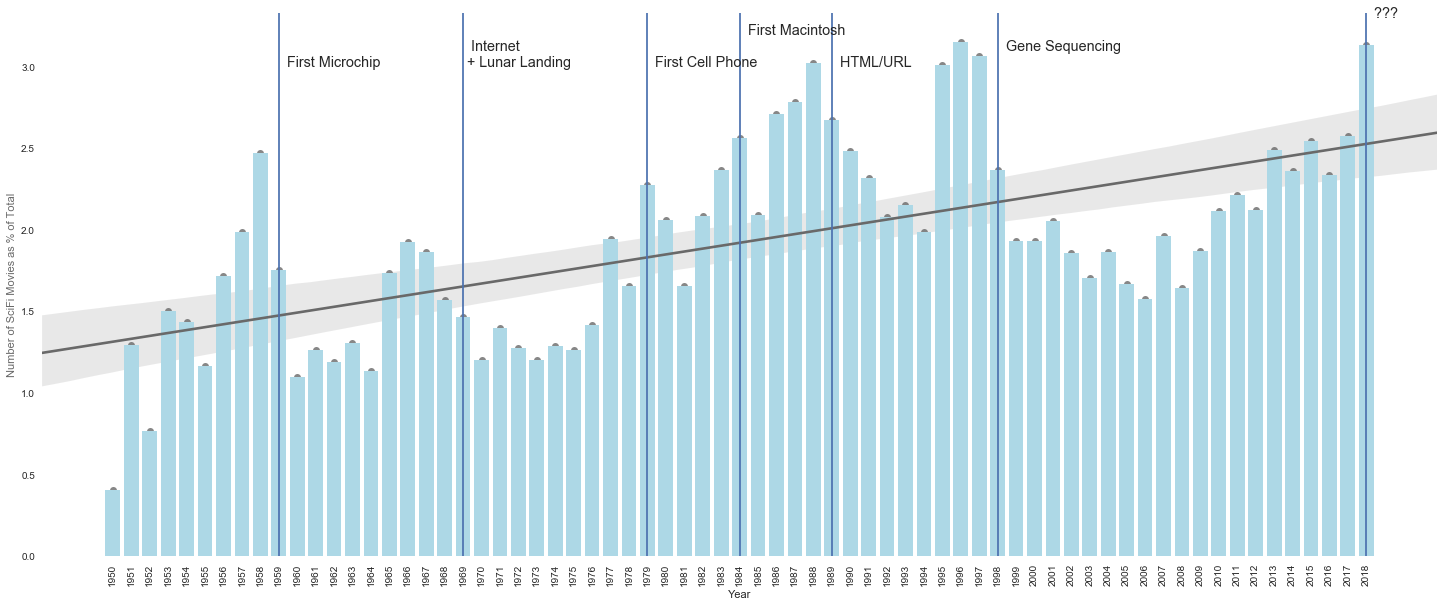

In [8]:
#define data for plotting
x=sciratio["Year"]
y=sciratio["Ratio"]

#Setup Bar Plot
fig, ax = plt.subplots(figsize=(25,10))
ax.set_facecolor('white')
ax.bar(x,y, color='lightblue') #plot scifi-ratio bars
plt.xticks(x, rotation=90)  #rotate date labels
ax.grid(False)

#plot regression
sns.regplot(x,y, data=sciratio, color="dimgray")

#labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of SciFi Movies as % of Total", color='dimgray')

#key inventions

ax.axvline(x=x['1959']) #Microchip
ax.text(x['1959'], 3, '  First Microchip', fontsize='x-large')

ax.axvline(x=x['1969']) #Internet
ax.text(x['1969'], 3, '  Internet \n + Lunar Landing', fontsize='x-large')

ax.axvline(x=x['1979']) #Cell Phone
ax.text(x['1979'], 3, '  First Cell Phone', fontsize='x-large')

ax.axvline(x=x['1989']) #HTML
ax.text(x['1989'], 3, '  HTML/URL', fontsize='x-large')

ax.axvline(x=x['1984']) #Mac
ax.text(x['1984'], 3.2, '  First Macintosh', fontsize='x-large')

ax.axvline(x=x['1998']) #Gene Sequencing
ax.text(x['1998'], 3.1, '  Gene Sequencing', fontsize='x-large')

ax.axvline(x=x['2018']) #???
ax.text(x['2018'], 3.3, '  ???', fontsize='x-large')

In [9]:
#Pull Dow Jones Data
dji = pd.read_csv("dji_y.csv", delimiter=',', encoding="utf-8-sig") #pull in CSV, re-create column names
dji['Date'] = dji['Date'].str[:4] #convert date to year only
dji.index = dji['Date'] #change index
columns = ['Open', 'High', 'Low', 'Volume']
dji.drop(columns, inplace=True, axis=1) #drop unneeded columns
dji['Return'] = dji['Close'].pct_change(1) #calculate return
dji_mean = np.mean(dji['Return']) #calculate mean return
dji['Above Average'] = (dji['Return'] - dji_mean)*100 #% yearly return in relation to mean since 1950
dji = dji.loc['1950':'2018'] #set date range

Next we take a look at how periods of peak interest in the Sci-Fi genre correlate to market returns.
Ideally I'd like to use a proxy for tech sector returns, but since I don’t have a tech index with data running back to 1950, I'll use S&P returns for now. (If anyone has recommendations for an index or asset that will better track tech innovations, please let me know).

In the below chart, I've plotted the S&P returns (Red line),and highlighted in green the years in which S&P returns were greater than 1 standard deviation above its 7.8% average for the period studied. Conversely, red bars highlight returns less than 1 standard deviation below average. 

In [10]:
#create Color list for bar plot
stdev = np.std(dji['Above Average'])
lst = dji['Above Average'].tolist()
colors = []

for i in lst:
    if i > stdev:
        colors.insert(len(lst),'lightgreen')
    elif i < -stdev:
        colors.insert(len(lst), 'lightcoral')
    else:
        colors.insert(len(lst),'lightblue')

Text(0,0.5,'% of Sci-Fi Movies to Total Movies')

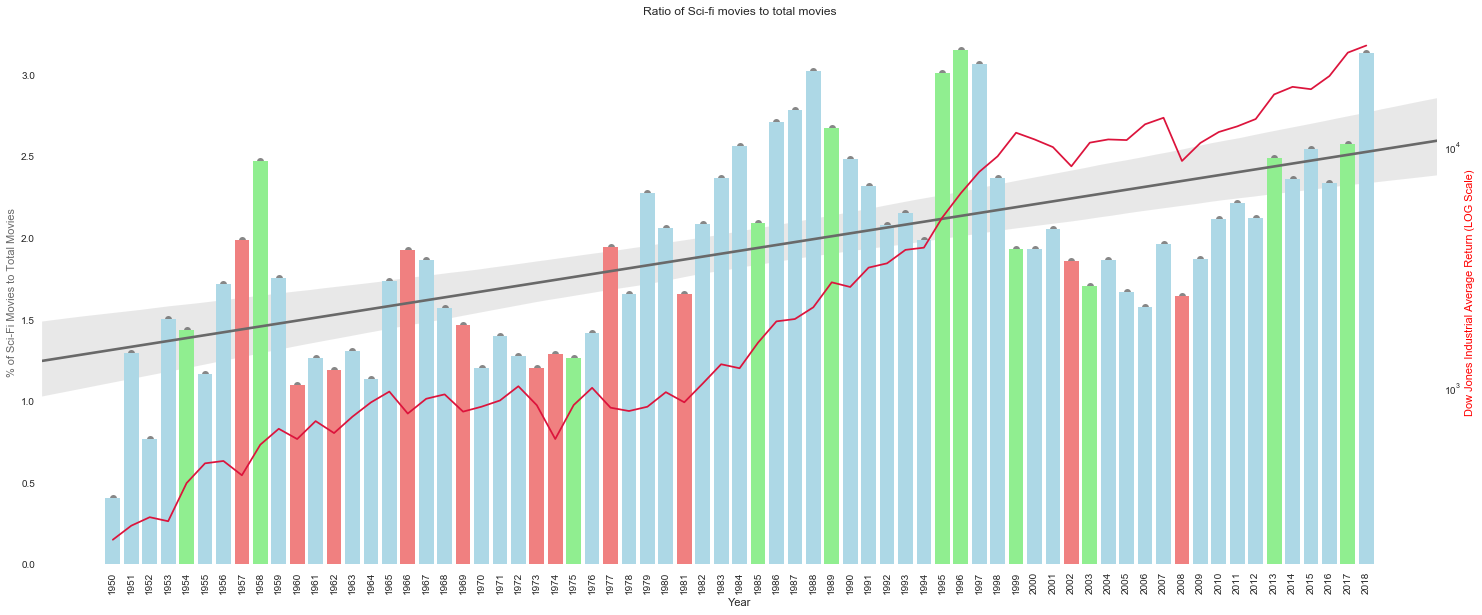

In [11]:
### Movies Vs The Dow Jones ###

#define data for plotting
x=sciratio["Year"]
y=sciratio["Ratio"]

#Setup Bar Plot
fig, ax = plt.subplots(figsize=(25,10))
ax.set_facecolor('white')
ax.bar(x,y, color=colors) #plot scifi-ratio bars
plt.xticks(x, rotation=90)  #rotate date labels
ax.grid(False)

#plot regression
sns.regplot(x,y, data=sciratio, color="dimgray")

#plot Dow Jones
ax2 = ax.twinx()
ax2.plot(x,dji['Close'], color='crimson')
ax2.set_yscale('log')
ax2.grid(False)
ax2.set_ylabel('Dow Jones Industrial Average Return (LOG Scale)', color='red')

#labels
ax.set_title("Ratio of Sci-fi movies to total movies")
ax.set_xlabel("Year")
ax.set_ylabel("% of Sci-Fi Movies to Total Movies", color='dimgray')


In [12]:
#descriptive statistics
correlation = dji['Return'].corr(sciratio['Ratio'])
print("Correlation between Dow Jones returns and the ratio of scifi movies to total movies =",round(correlation,2) )

Correlation between Dow Jones returns and the ratio of scifi movies to total movies = 0.21


Since 1950 there have been 11 years in which the Dow Jones has posted a return greater than 1 standard deviation above the historical average. 8 of those returns occurred in years where the number of sci-fi movies to total movies was above the historical regression line.
Meaning that of the 1+ standard dev moves in the Dow Jones, 73% occurred in years where interest in Science Fiction was strong.

When we compare the correlation between the DJIA returns and the scifi movie ratio, we see only a moderate yet positive correlation of 0.21.

In itself the SciFi ratio wouldn't be a signal I'd confidently base trades off of, but it could be an interesting stat to follow in conjuncture with other cultural trend indicators.